# Team D1

# "Covid-19 Detection Using Chest X-Ray Images"

## Under The Guidance Of: Ms. Preeti T

###### Importing Libraries

In [1]:
import numpy as np

C:\Users\91934\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91934\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\91934\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from tensorflow.keras import layers
import cv2 as cv
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
import keras
from tensorflow.keras.layers import Layer
from tensorflow import keras
import keras.backend as K
import tensorflow as tf

###### Specifying the dataset path

In [7]:
DATASET="D:\\Sem6\\Minor_Project\\Dataset\\train"
DATASET2="D:\\Sem6\\Minor_Project\\Dataset\\test"

In [8]:
CATEGORIES=["Bacterial_Pneumonia","COVID","Normal"]

###### Loading the dataset

In [9]:
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

In [10]:
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.resize(img,(128,128))
            test_data.append([img,label])

In [11]:
print(len(train_data))
print(len(test_data))

8122
2033


In [12]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [13]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [14]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [15]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
X_test.shape

(2033, 128, 128, 3)

In [16]:
from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Pre-Trained Models

# 1. VGG16

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model1 = VGG16(input_shape = (128,128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [15]:
for layer in base_model1.layers:
    layer.trainable = False

In [16]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model1.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout 
x = layers.Dropout(0.3)(x)

x = layers.Dense(3, activation='softmax')(x)

model1 = tf.keras.models.Model(base_model1.input, x)

model1.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['acc'])

In [17]:
vgghist = model1.fit(X_train,one_hot_train,validation_split=0.2,epochs = 10)

Epoch 1/10
204/204 [==============================] - 633s 3s/step - loss: 0.6746 - acc: 0.7793 - val_loss: 0.1775 - val_acc: 0.9311
Epoch 2/10
204/204 [==============================] - 641s 3s/step - loss: 0.1688 - acc: 0.9373 - val_loss: 0.1758 - val_acc: 0.9298
Epoch 3/10
204/204 [==============================] - 641s 3s/step - loss: 0.1517 - acc: 0.9365 - val_loss: 0.1189 - val_acc: 0.9588
Epoch 4/10
204/204 [==============================] - 638s 3s/step - loss: 0.1067 - acc: 0.9596 - val_loss: 0.1345 - val_acc: 0.9532
Epoch 5/10
204/204 [==============================] - 641s 3s/step - loss: 0.0948 - acc: 0.9673 - val_loss: 0.1294 - val_acc: 0.9625
Epoch 6/10
204/204 [==============================] - 625s 3s/step - loss: 0.0862 - acc: 0.9679 - val_loss: 0.1100 - val_acc: 0.9662
Epoch 7/10
204/204 [==============================] - 632s 3s/step - loss: 0.0902 - acc: 0.9681 - val_loss: 0.1261 - val_acc: 0.9594
Epoch 8/10
204/204 [==============================] - 623s 3s/step - 

### Training Score

In [18]:
train_loss,train_acc=model1.evaluate(X_train,one_hot_train)
train_loss,train_acc

254/254 [==============================] - 606s 2s/step - loss: 0.0451 - acc: 0.9867


(0.04507894814014435, 0.9867027997970581)

### Testing Score

In [19]:
test_loss,test_acc=model1.evaluate(X_test,one_hot_test)
test_loss,test_acc

64/64 [==============================] - 153s 2s/step - loss: 0.0832 - acc: 0.9754


(0.0832076370716095, 0.9754058122634888)

## Learning Curves

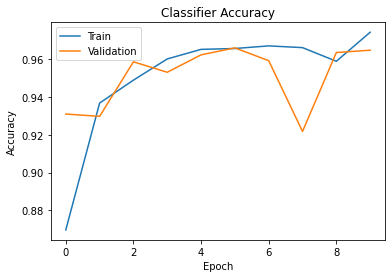

In [20]:
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

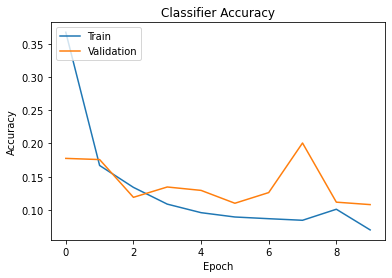

In [21]:
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [41]:
import cv2
img1=cv2.imread("D:\\Sem6\\Minor_Project\\TEST\\NORMAL_1.png")
img1=cv2.resize(img1,(128,128))
img1=np.array(img1).reshape(-1,128,128,3)
img1=img1/255.0

In [42]:
y_pred = np.argmax(model1.predict(img1), axis=-1)

In [43]:
if y_pred == 0:
    print("Bacterial Pneumonia")
elif y_pred == 1:
    print("Covid-19")
else: 
    print("Normal")

Normal


In [91]:
model1.save('vgg16three.h5')

In [36]:
model1=keras.models.load_model('vgg16three.h5')

# 2. RESNET 50

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model2 = ResNet50(input_shape = (128,128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [15]:
for layer in base_model2.layers:
    layer.trainable = False

In [32]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model2.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout 
x = layers.Dropout(0.3)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)

model2 = tf.keras.models.Model(base_model2.input, x)

model2.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['acc'])

In [33]:
reshist = model2.fit(X_train,one_hot_train,validation_split=0.2,epochs = 10)

Epoch 1/10
204/204 [==============================] - 312s 1s/step - loss: 1.2320 - acc: 0.4509 - val_loss: 0.8469 - val_acc: 0.5391
Epoch 2/10
204/204 [==============================] - 285s 1s/step - loss: 0.7577 - acc: 0.6653 - val_loss: 0.6523 - val_acc: 0.7200
Epoch 3/10
204/204 [==============================] - 292s 1s/step - loss: 0.5804 - acc: 0.7488 - val_loss: 0.5705 - val_acc: 0.7329
Epoch 4/10
204/204 [==============================] - 290s 1s/step - loss: 0.5195 - acc: 0.7609 - val_loss: 0.4791 - val_acc: 0.7902
Epoch 5/10
204/204 [==============================] - 282s 1s/step - loss: 0.4407 - acc: 0.8174 - val_loss: 0.5036 - val_acc: 0.7828
Epoch 6/10
204/204 [==============================] - 275s 1s/step - loss: 0.4900 - acc: 0.7848 - val_loss: 0.4206 - val_acc: 0.8246
Epoch 7/10
204/204 [==============================] - 275s 1s/step - loss: 0.4380 - acc: 0.8028 - val_loss: 0.3822 - val_acc: 0.8369
Epoch 8/10
204/204 [==============================] - 274s 1s/step - 

### Training score and loss

In [36]:
train_loss1,train_acc1=model2.evaluate(X_train,one_hot_train)
train_loss1,train_acc1

254/254 [==============================] - 270s 1s/step - loss: 0.3460 - acc: 0.8455


(0.34599804878234863, 0.8454813957214355)

### Testing score and loss

In [37]:
test_loss1,test_acc1=model2.evaluate(X_test,one_hot_test)
test_loss1,test_acc1

64/64 [==============================] - 66s 1s/step - loss: 0.3606 - acc: 0.8431


(0.360634446144104, 0.8430890440940857)

## Learning Curves

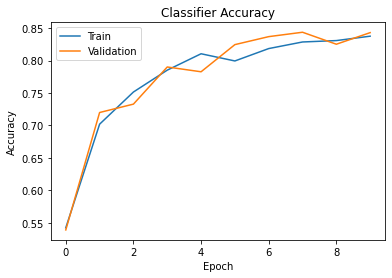

In [34]:
plt.plot(reshist.history['acc'])
plt.plot(reshist.history['val_acc'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

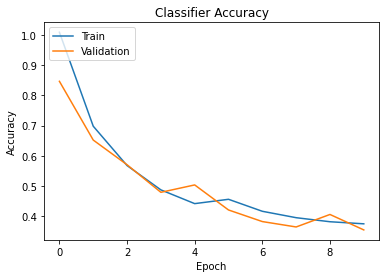

In [35]:
plt.plot(reshist.history['loss'])
plt.plot(reshist.history['val_loss'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [45]:
import cv2
img2=cv2.imread("D:\\Sem6\\Minor_Project\\TEST\\NORMAL_1.png")
img2=cv2.resize(img2,(128,128))
img2=np.array(img2).reshape(-1,128,128,3)
img2=img2/255.0

In [48]:
y_pred = np.argmax(model2.predict(img2), axis=-1)

In [49]:
if y_pred == 0:
    print("Bacterial Pneumonia")
elif y_pred == 1:
    print("Covid-19")
else: 
    print("Normal")

Normal


In [42]:
model2.save('resnet50four.h5')

In [44]:
model2=keras.models.load_model('resnet50four.h5')

# 3. Inception_V3

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model3 = InceptionV3(input_shape = (128,128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [18]:
for layer in base_model3.layers:
    layer.trainable = False

In [73]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model3.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout 
x = layers.Dropout(0.3)(x)

x = layers.Dense(3, activation='softmax')(x)

model3 = tf.keras.models.Model(base_model3.input, x)

model3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),loss = 'categorical_crossentropy',metrics = ['acc'])

In [74]:
xcephist = model3.fit(X_train,one_hot_train,validation_split=0.2,epochs = 10)

Epoch 1/10
204/204 [==============================] - 137s 610ms/step - loss: 1.3099 - acc: 0.5300 - val_loss: 0.4946 - val_acc: 0.7982
Epoch 2/10
204/204 [==============================] - 118s 578ms/step - loss: 0.6439 - acc: 0.7239 - val_loss: 0.4248 - val_acc: 0.8302
Epoch 3/10
204/204 [==============================] - 119s 582ms/step - loss: 0.5067 - acc: 0.7841 - val_loss: 0.3733 - val_acc: 0.8320
Epoch 4/10
204/204 [==============================] - 120s 590ms/step - loss: 0.4371 - acc: 0.8134 - val_loss: 0.3647 - val_acc: 0.8431
Epoch 5/10
204/204 [==============================] - 119s 583ms/step - loss: 0.3999 - acc: 0.8350 - val_loss: 0.3338 - val_acc: 0.8542
Epoch 6/10
204/204 [==============================] - 119s 586ms/step - loss: 0.3639 - acc: 0.8486 - val_loss: 0.3109 - val_acc: 0.8646
Epoch 7/10
204/204 [==============================] - 121s 593ms/step - loss: 0.3636 - acc: 0.8498 - val_loss: 0.3179 - val_acc: 0.8646
Epoch 8/10
204/204 [============================

In [75]:
train_loss3,train_acc3=model3.evaluate(X_train,one_hot_train)
train_loss3,train_acc3

254/254 [==============================] - 117s 456ms/step - loss: 0.2270 - acc: 0.9080


(0.22698974609375, 0.9080275893211365)

In [76]:
test_loss3,test_acc3=model3.evaluate(X_test,one_hot_test)
test_loss3,test_acc3

64/64 [==============================] - 29s 457ms/step - loss: 0.2814 - acc: 0.8834


(0.28141239285469055, 0.8834235072135925)

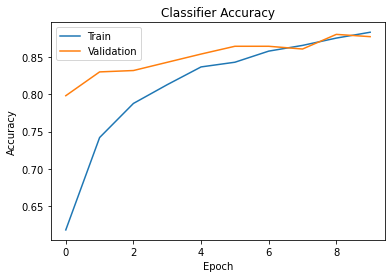

In [77]:
plt.plot(xcephist.history['acc'])
plt.plot(xcephist.history['val_acc'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

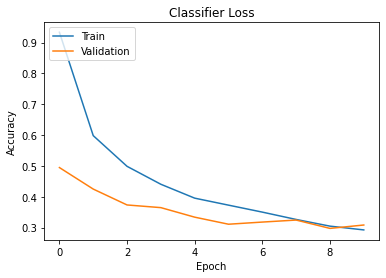

In [78]:
plt.plot(xcephist.history['loss'])
plt.plot(xcephist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [51]:
import cv2
img3=cv2.imread("D:\\Sem6\\Minor_Project\\TEST\\COVID_722.png")
img3=cv2.resize(img3,(128,128))
img3=np.array(img3).reshape(-1,128,128,3)
img3=img3/255.0

In [54]:
y_pred = np.argmax(model3.predict(img3), axis=-1)

In [55]:
if y_pred == 0:
    print("Bacterial Pneumonia")
elif y_pred == 1:
    print("Covid-19")
else: 
    print("Normal")

Covid-19


In [79]:
model3.save('inceptionthree.h5')

In [50]:
model3=keras.models.load_model('inceptionthree.h5')